In [1]:
import pandas as pd

data = pd.read_csv('Student_performance_data _.csv')

In [2]:
data.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

NOW I WILL STUDY RELATION BEETWEEN GENDER AND SOME OTHER VARIABLES :D

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
gpa_male = data[data['Gender'] == 1]['GPA']
gpa_female = data[data['Gender'] == 0]['GPA']

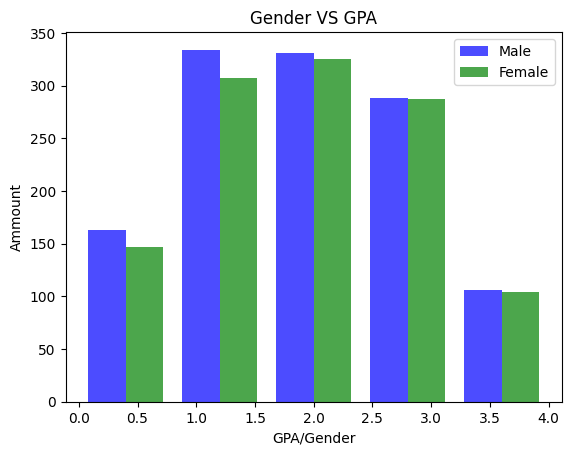

In [5]:
fig, ax = plt.subplots(1, 1) 

ax.set_title("Gender VS GPA") 
  
# adding labels 
ax.set_xlabel('GPA/Gender') 
ax.set_ylabel('Ammount') 

# Plot the histogram
plt.hist([gpa_male, gpa_female], bins=5, label=['Male', 'Female'], color=['blue', 'green'], alpha=0.7)
ax.legend()


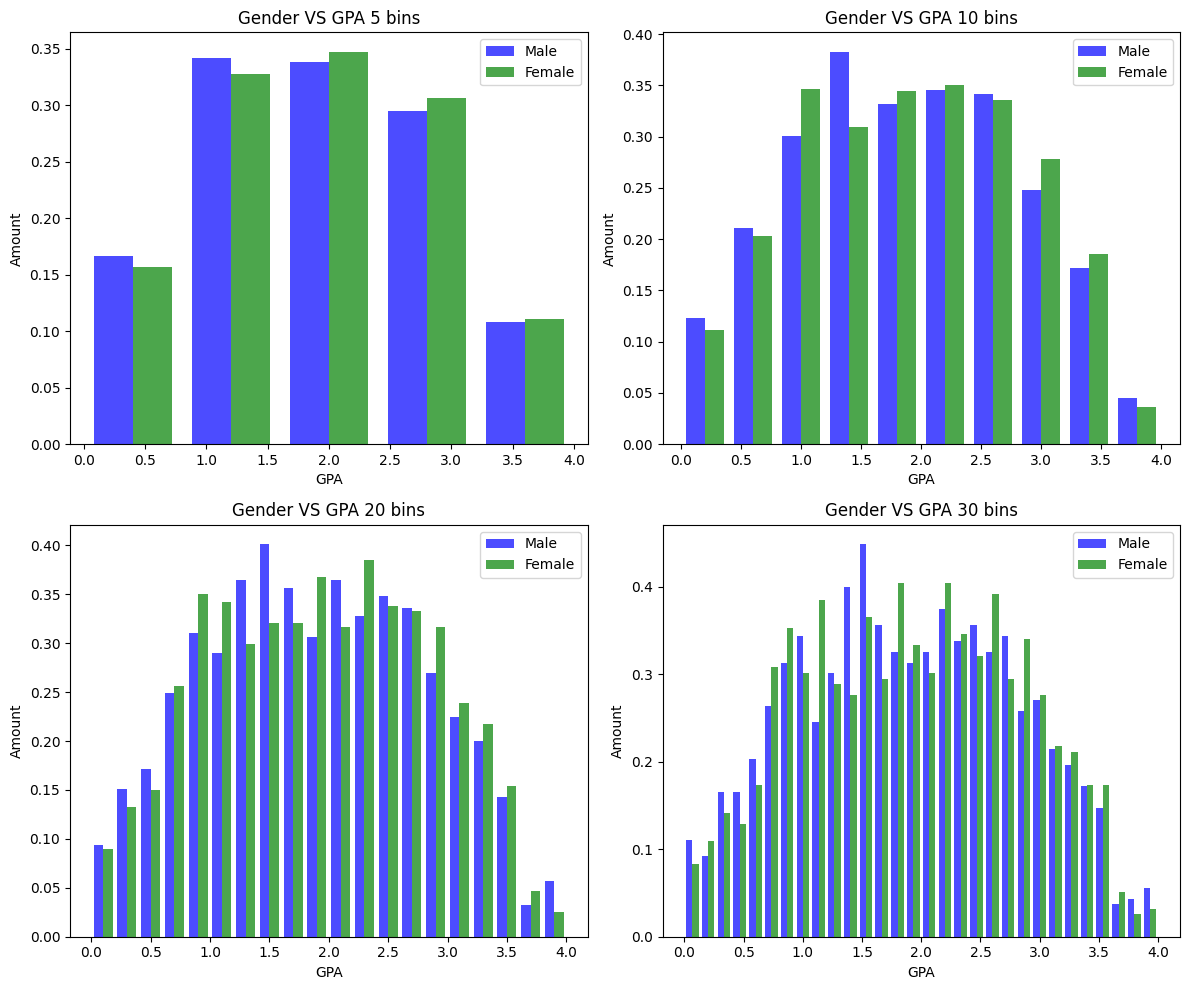

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1
axs[0, 0].hist([gpa_male, gpa_female], bins=5, label=['Male', 'Female'], color=['blue', 'green'], alpha=0.7, density=True)
axs[0, 0].set_title("Gender VS GPA 5 bins")
axs[0, 0].set_xlabel('GPA')
axs[0, 0].set_ylabel('Amount')
axs[0, 0].legend()

# Subplot 2
axs[0, 1].hist([gpa_male, gpa_female], bins=10, label=['Male', 'Female'], color=['blue', 'green'], alpha=0.7, density=True)
axs[0, 1].set_title("Gender VS GPA 10 bins")
axs[0, 1].set_xlabel('GPA')
axs[0, 1].set_ylabel('Amount')
axs[0, 1].legend()

# Subplot 3
axs[1, 0].hist([gpa_male, gpa_female], bins=20, label=['Male', 'Female'], color=['blue', 'green'], alpha=0.7, density=True)
axs[1, 0].set_title("Gender VS GPA 20 bins")
axs[1, 0].set_xlabel('GPA')
axs[1, 0].set_ylabel('Amount')
axs[1, 0].legend()

# Subplot 4
axs[1, 1].hist([gpa_male, gpa_female], bins=30, label=['Male', 'Female'], color=['blue', 'green'], alpha=0.7, density=True)
axs[1, 1].set_title("Gender VS GPA 30 bins")
axs[1, 1].set_xlabel('GPA')
axs[1, 1].set_ylabel('Amount')
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

Results are kinda funny, but very interesting.

In [20]:
# maybe it will be useful later
def hist4_gpa_gender(gpa_male, gpa_female, labels=['Male', 'Female']) -> None:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Subplot 1
    axs[0, 0].hist([gpa_male, gpa_female], bins=5, label=labels, color=['blue', 'green'], alpha=0.7, density=True)
    axs[0, 0].set_title("Gender VS GPA 5 bins")
    axs[0, 0].set_xlabel('GPA')
    axs[0, 0].set_ylabel('Amount')
    axs[0, 0].legend()

    # Subplot 2
    axs[0, 1].hist([gpa_male, gpa_female], bins=10, label=labels, color=['blue', 'green'], alpha=0.7, density=True)
    axs[0, 1].set_title("Gender VS GPA 10 bins")
    axs[0, 1].set_xlabel('GPA')
    axs[0, 1].set_ylabel('Amount')
    axs[0, 1].legend()

    # Subplot 3
    axs[1, 0].hist([gpa_male, gpa_female], bins=20, label=labels, color=['blue', 'green'], alpha=0.7, density=True)
    axs[1, 0].set_title("Gender VS GPA 20 bins")
    axs[1, 0].set_xlabel('GPA')
    axs[1, 0].set_ylabel('Amount')
    axs[1, 0].legend()

    # Subplot 4
    axs[1, 1].hist([gpa_male, gpa_female], bins=30, label=labels, color=['blue', 'green'], alpha=0.7, density=True)
    axs[1, 1].set_title("Gender VS GPA 30 bins")
    axs[1, 1].set_xlabel('GPA')
    axs[1, 1].set_ylabel('Amount')
    axs[1, 1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plot
    plt.show()

In [60]:
def comprasion_female_male_gpa(gpa_female, gpa_male) -> None:
    TOP_START = 3.0
    END_START = 1.0

    # top calcs
    top_gpa_female = gpa_female[gpa_female > TOP_START]
    top_gpa_male = gpa_male[gpa_male > TOP_START]

    males = len(top_gpa_male) / len(gpa_male)
    females = len(top_gpa_female) / len(gpa_female)
    print(f' % THAT HAS ABOVE {TOP_START}')
    print("\n MALES:",  males, "\n FEMALES:", females)
    print("\n DELTA MALES - FEMALES:", males - females)

    # tail calcs
    tail_gpa_female = gpa_female[gpa_female < END_START]
    tail_gpa_male = gpa_male[gpa_male < END_START]

    males = len(tail_gpa_male) / len(gpa_male)
    females = len(tail_gpa_female) / len(gpa_female)
    print(f' % THAT HAS BELOW {END_START}')
    print("\n MALES:",  males, "\n FEMALES:", females)
    print("\n DELTA MALES - FEMALES:", males - females)

In [61]:
comprasion_female_male_gpa(gpa_female, gpa_male)

 % THAT HAS ABOVE 3.0

 MALES: 0.13175122749590834 
 FEMALES: 0.13675213675213677

 DELTA MALES - FEMALES: -0.005000909256228425
 % THAT HAS BELOW 1.0

 MALES: 0.1955810147299509 
 FEMALES: 0.19572649572649573

 DELTA MALES - FEMALES: -0.00014548099654482227


: o

lets  build model to predict GPA :D

In [62]:
import keras

In [63]:
data.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [67]:
data.shape

(2392, 15)

In [78]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=64, kernel_regularizer='l1', kernel_initializer='uniform'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=256, kernel_regularizer='l1', kernel_initializer='uniform'))
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Dense(units=128, kernel_regularizer='l1', kernel_initializer='uniform'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1, kernel_regularizer='l2', kernel_initializer='uniform'))

In [79]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.MeanSquaredError(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
)

In [105]:
Y_collumn = 'GPA'
X_collumns = list(data.columns)

In [106]:
X_collumns.remove('GPA')
X_collumns.remove('StudentID')

In [107]:
X_collumns

['Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'StudyTimeWeekly',
 'Absences',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GradeClass']

In [112]:
model.fit(data[X_collumns], data[Y_collumn], epochs=10_000)

Epoch 1/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.0016 - false_negatives_1: 45.8947 - loss: 0.3559  
Epoch 2/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - binary_accuracy: 0.0028 - false_negatives_1: 46.6053 - loss: 0.3549
Epoch 3/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - binary_accuracy: 0.0013 - false_negatives_1: 42.6974 - loss: 0.3601
Epoch 4/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - binary_accuracy: 0.0026 - false_negatives_1: 38.8816 - loss: 0.3609
Epoch 5/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - binary_accuracy: 0.0031 - false_negatives_1: 42.1842 - loss: 0.3507
Epoch 6/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.0022 - false_negatives_1: 40.0526 - loss: 0.3470  
Epoch 7/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - binary_accuracy: 0.0042 - false_negatives_1: 36.7368 - loss: 0.3550
Epoch 8/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - binary_accuracy: 0.0023 - false_negatives_1: 40.3158 - loss: 0.3461 

In [113]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,685 (592.52 KB)

 Trainable params: 50,561 (197.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,124 (395.02 KB)

In [114]:
loss = model.evaluate(data[X_collumns], data[Y_collumn], verbose=0)

i forgot to divide data sets but i am too lazy to run fit again so model ev willbe on train test XD

In [115]:
predictions = model.predict(data[X_collumns])

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step


In [120]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(data[Y_collumn], predictions)
r2 = r2_score(data[Y_collumn], predictions)

print(f'MAE: {mae:.4f}, R²: {r2:.4f}')

MAE: 0.1982, R²: 0.9277


Its not bad

But i am curious about correalction beetween studied hours and GPA

In [121]:
from scipy.stats import spearmanr

In [122]:
corr, _ = spearmanr(data['StudyTimeWeekly'], data['GPA'])
print(f'Spearman correlation: {corr:.4f}')

Spearman correlation: 0.1691


What aboout absences?

In [124]:
corr, _ = spearmanr(data['Absences'], data['GPA'])
print(f'Spearman correlation: {corr:.4f}')

Spearman correlation: -0.9255


I have to be more often in school XD

Almost perfect inverse corelation

Lets study music

In [129]:
gpa_music = data[data['Music'] == 1]['GPA']
gpa_no_music = data[data['Music'] == 0]['GPA']

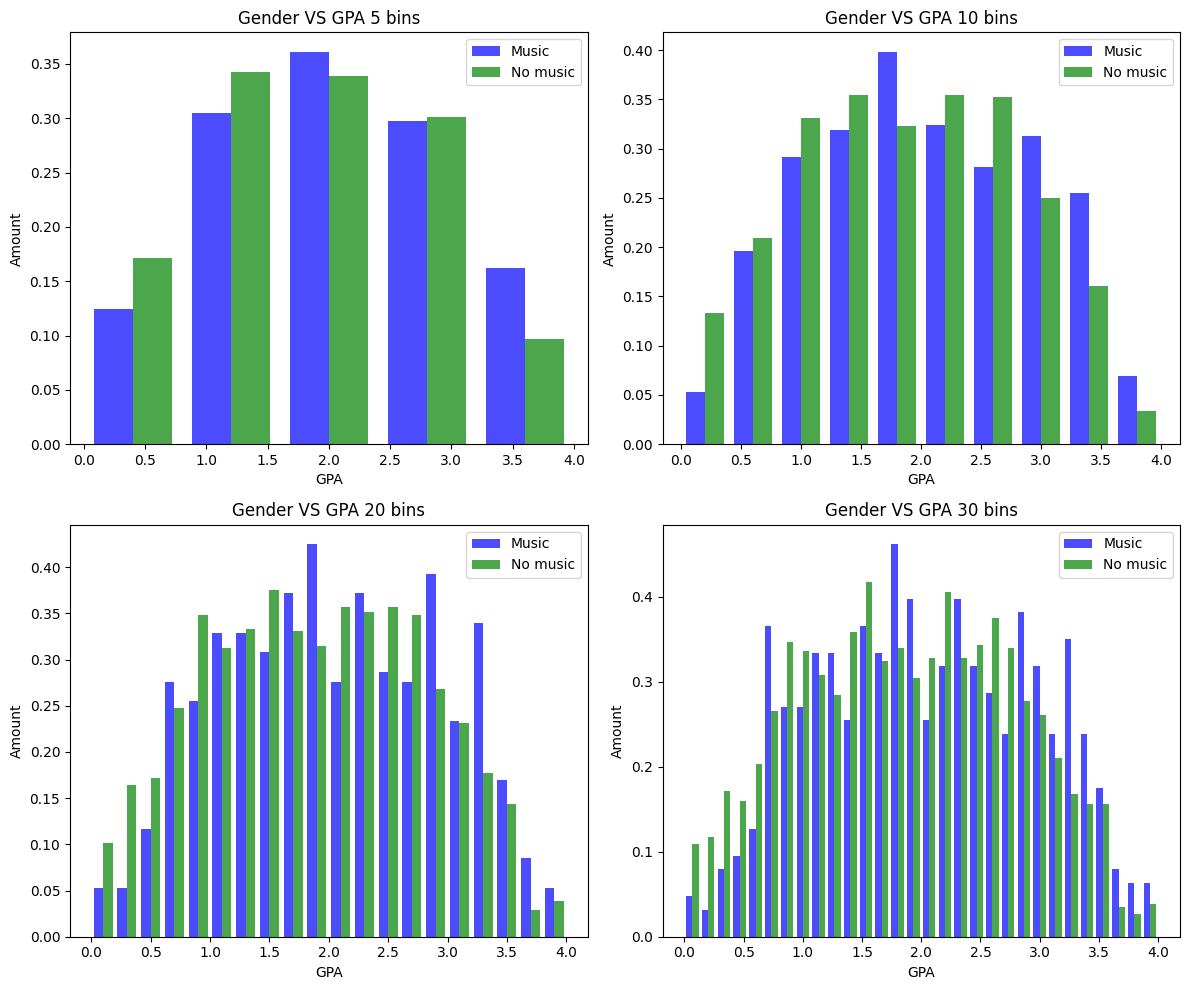

In [130]:
hist4_gpa_gender(gpa_music, gpa_no_music, labels=['Music', 'No music'])

Functions is a bit poor

In [141]:
def render4_hist(x, y, xy_labels: list[str], labels: list[str], main_title: str, bins: list = [5, 10, 20, 30]) -> None:
    if len(bins) == 4:
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        for idx, bin in enumerate(bins):
            row = idx // 2
            col = idx % 2
            axs[row, col].hist([x, y], bins=bin, label=labels, color=['blue', 'green'], alpha=0.7, density=True)
            axs[row, col].set_title(f"{main_title} bins: {bin}")
            axs[row, col].set_xlabel(xy_labels[0])
            axs[row, col].set_ylabel(xy_labels[1])
            axs[row, col].legend()
        plt.tight_layout()
        plt.show()
    else:
        raise ValueError('List of bins must contain 4 elements')


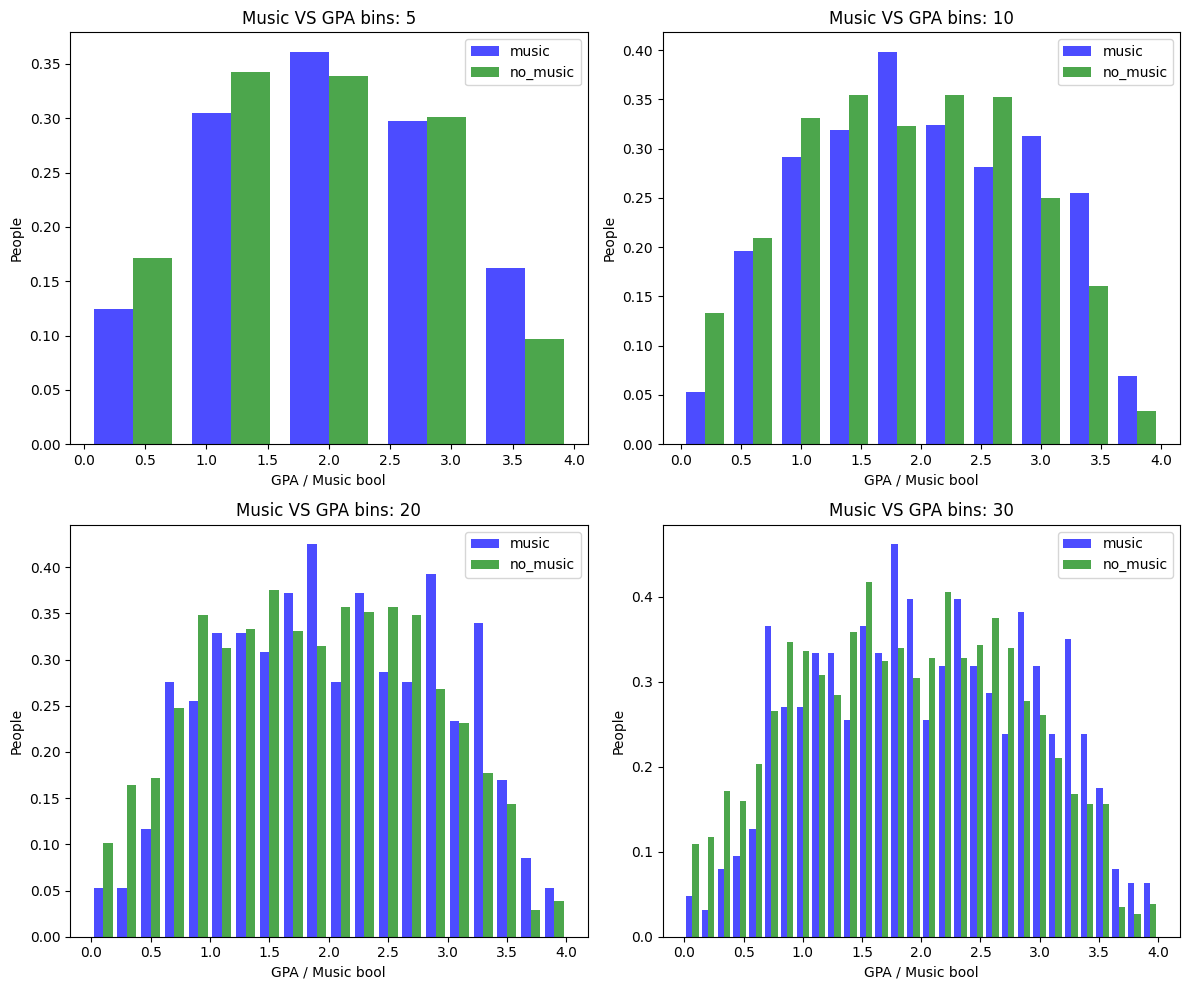

In [143]:
render4_hist(gpa_music, gpa_no_music, ['GPA / Music bool', 'People'], ['music', 'no_music'], 'Music VS GPA')

Music is cleary a booster

Lets check sports

In [145]:
gpa_sport = data[data['Sports'] == 1]['GPA']
gpa_no_sport = data[data['Sports'] == 0]['GPA']

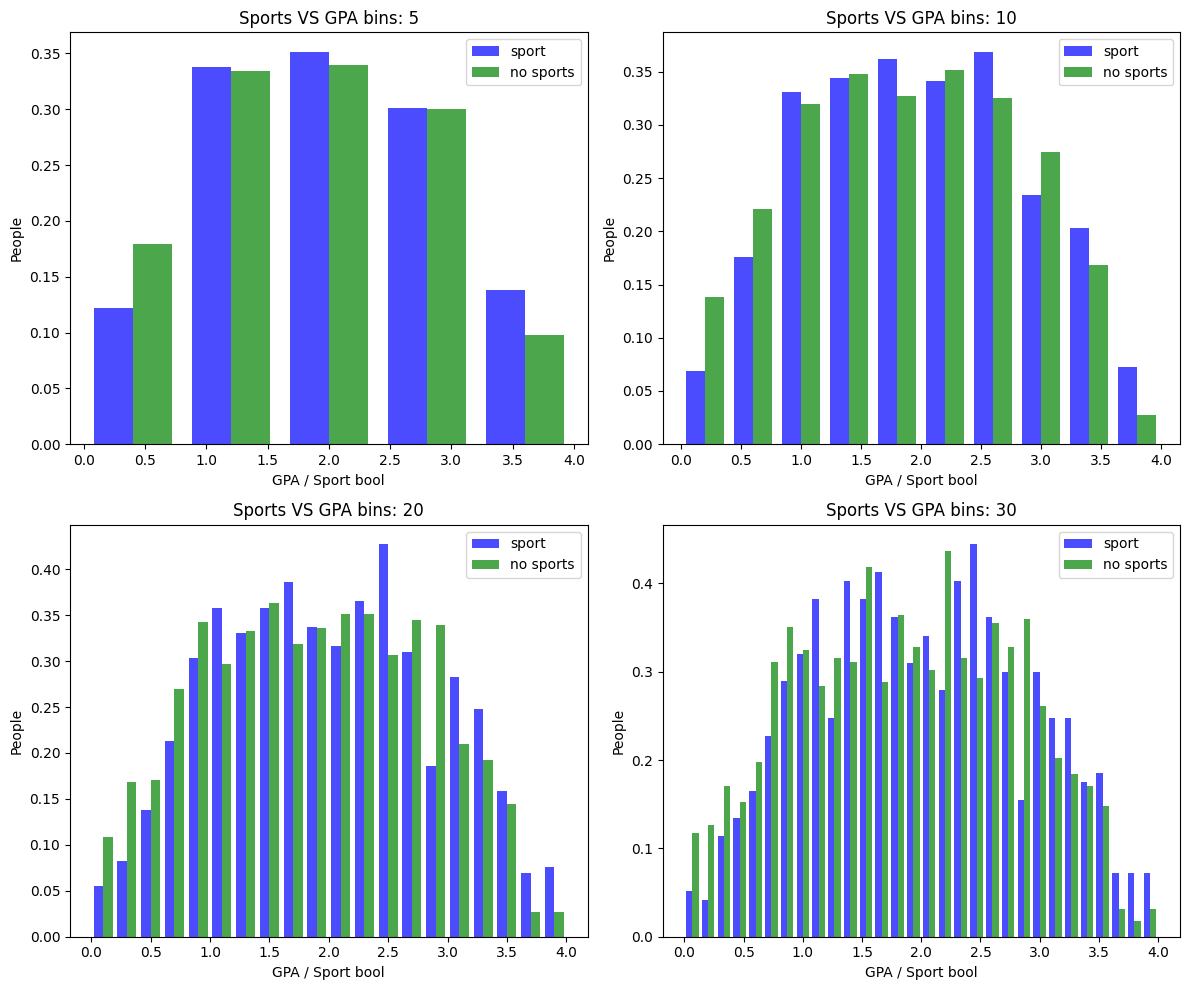

In [146]:
render4_hist(gpa_sport, gpa_no_sport, ['GPA / Sport bool', 'People'], ['sport', 'no sports'], 'Sports VS GPA')

: o

I can clearly see what I need to work on